# 50 STARTUPS ANALYSIS

In [1]:
# importing the packages
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
# reading the data file
def read_data():
    data=pd.read_csv("C:/Top/50_Startups.csv")
    return data

In [32]:
# calling
data= read_data()
print(data.head(5))



   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
#convert state string into integer
lb= LabelEncoder()
data["State"]=lb.fit_transform(data["State"])
print(data.head())

   R&D Spend  Administration  Marketing Spend  State     Profit
0  165349.20       136897.80        471784.10      2  192261.83
1  162597.70       151377.59        443898.53      0  191792.06
2  153441.51       101145.55        407934.54      1  191050.39
3  144372.41       118671.85        383199.62      2  182901.99
4  142107.34        91391.77        366168.42      1  166187.94


<Axes: >

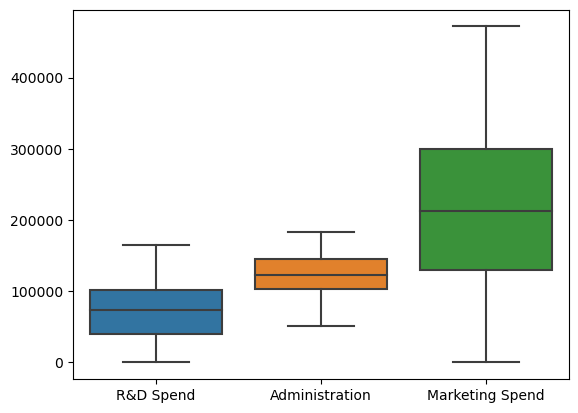

In [36]:

#Exploratory Data Analysis
sns.boxplot(data=data.loc[:, ['R&D Spend', 'Administration','Marketing Spend']])


Text(0.5, 1.0, 'R&D Spend VS Profit')

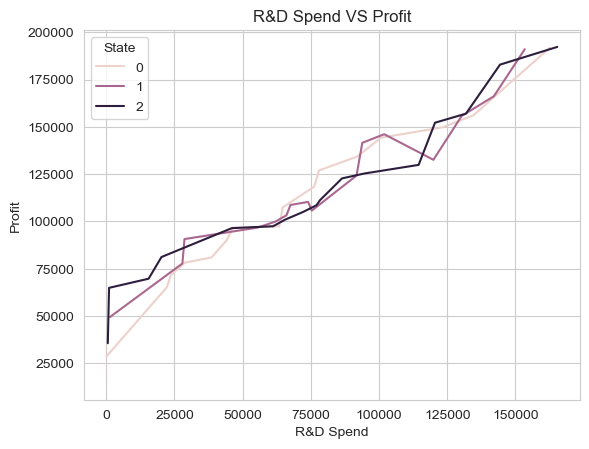

In [37]:
sns.set_style("whitegrid")
sns.lineplot(x="R&D Spend",y="Profit",data=data,hue="State")
plt.title("R&D Spend VS Profit")

In [ ]:
#Linear Regression
#R&D Spend  Administration  Marketing Spend  State     Profit

In [38]:
df=data[["R&D Spend","Administration","Marketing Spend","Profit"]]
print(df.head())

   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [39]:

df.shape


(50, 4)

In [41]:
#divid data into testing and training
training,testing=train_test_split(df,train_size=0.8)
training.head()

,R&D Spend,Administration,Marketing Spend,Profit
49,0.00,116983.80,45173.06,14681.40
3,144372.41,118671.85,383199.62,182901.99
45,1000.23,124153.04,1903.93,64926.08
1,162597.70,151377.59,443898.53,191792.06
18,91749.16,114175.79,294919.57,124266.90


In [42]:
testing.head()

,R&D Spend,Administration,Marketing Spend,Profit
37,44069.95,51283.14,197029.42,89949.14
21,78389.47,153773.43,299737.29,111313.02
4,142107.34,91391.77,366168.42,166187.94
20,76253.86,113867.30,298664.47,118474.03
40,28754.33,118546.05,172795.67,78239.91


In [43]:
training.shape,testing.shape


((40, 4), (10, 4))

In [44]:
X_train=training[["R&D Spend","Administration","Marketing Spend"]]
y_train=training["Profit"]
model=LinearRegression()
print(model)

LinearRegression()


In [45]:
train_model=model.fit(X_train,y_train)
print(train_model)

LinearRegression()


In [46]:
print(model.coef_)
print(model.intercept_)

[ 0.82756446 -0.02714673  0.02208695]
49331.1153656299


In [48]:
RDSpend =125678.14
Administration=1237895.18
MarketingSpend=458923.88
y =0.80733789*RDSpend -0.02881059*Administration+ 0.02881124*MarketingSpend + 50343.43195926117
print("Profit earned with R&D spend of {},administration spend of {} and marketing spend of {} is {} ".format(RDSpend,Administration,MarketingSpend,y))

Profit earned with R&D spend of 125678.14,administration spend of 1237895.18 and marketing spend of 458923.88 is 129365.83188044078 


<Axes: xlabel='R&D Spend', ylabel='Profit'>

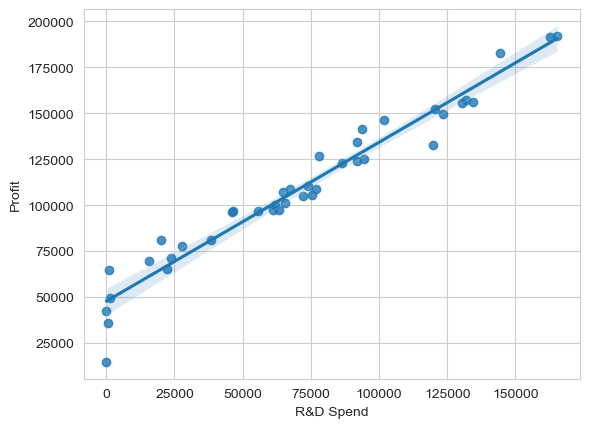

In [49]:
sns.regplot(x="R&D Spend",y="Profit",data=training)

In [50]:
X_test=testing[["R&D Spend","Administration","Marketing Spend"]]
X_test

,R&D Spend,Administration,Marketing Spend
37,44069.95,51283.14,197029.42
21,78389.47,153773.43,299737.29
4,142107.34,91391.77,366168.42
20,76253.86,113867.30,298664.47
40,28754.33,118546.05,172795.67
36,28663.76,127056.21,201126.82
11,100671.96,91790.61,249744.55
15,114523.61,122616.84,261776.23
28,66051.52,182645.56,118148.20
2,153441.51,101145.55,407934.54


In [51]:
pred_profit=train_model.predict(X_test)
pred_profit

array([ 88761.44844772, 116649.29054359, 172540.65389178, 115941.56118445,
        73725.56816909,  74045.34125417, 135667.93110281, 146559.97608698,
       101644.30918798, 182578.11298743])

In [53]:
testing["pred_profit"]=pred_profit
testing

,R&D Spend,Administration,Marketing Spend,Profit,pred_profit
37,44069.95,51283.14,197029.42,89949.14,88761.448448
21,78389.47,153773.43,299737.29,111313.02,116649.290544
4,142107.34,91391.77,366168.42,166187.94,172540.653892
20,76253.86,113867.30,298664.47,118474.03,115941.561184
40,28754.33,118546.05,172795.67,78239.91,73725.568169
36,28663.76,127056.21,201126.82,90708.19,74045.341254
11,100671.96,91790.61,249744.55,144259.40,135667.931103
15,114523.61,122616.84,261776.23,129917.04,146559.976087
28,66051.52,182645.56,118148.20,103282.38,101644.309188
2,153441.51,101145.55,407934.54,191050.39,182578.112987


In [54]:
testing["Error"]=testing["Profit"]-testing["pred_profit"]
testing

,R&D Spend,Administration,Marketing Spend,Profit,pred_profit,Error
37,44069.95,51283.14,197029.42,89949.14,88761.448448,1187.691552
21,78389.47,153773.43,299737.29,111313.02,116649.290544,-5336.270544
4,142107.34,91391.77,366168.42,166187.94,172540.653892,-6352.713892
20,76253.86,113867.30,298664.47,118474.03,115941.561184,2532.468816
40,28754.33,118546.05,172795.67,78239.91,73725.568169,4514.341831
36,28663.76,127056.21,201126.82,90708.19,74045.341254,16662.848746
11,100671.96,91790.61,249744.55,144259.40,135667.931103,8591.468897
15,114523.61,122616.84,261776.23,129917.04,146559.976087,-16642.936087
28,66051.52,182645.56,118148.20,103282.38,101644.309188,1638.070812
2,153441.51,101145.55,407934.54,191050.39,182578.112987,8472.277013


In [57]:
r2_score(testing['Profit'],testing['pred_profit'])

0.9314872053307002

In [59]:
from math import sqrt
sqrt(mean_squared_error(testing['Profit'],testing['pred_profit']))

8943.992342866431